# Домашнее задание №6. Кластеризация и SVM

## Ф.И.О: Маслак Иван Александрович

В этом домашнем задании вам предстоит собственноручно написать методы кластеризации и метод опорных векторов. В качестве вспомогательных материалов мы прилагаем ссылки на статьи и ресурсы, которые содержат подробную информацию о представленных алгоритмах.

#### Полезные ссылки:

1. [Описание](https://scikit-learn.org/stable/modules/clustering.html#k-means) K-means от scikit-learn
2. Статья по алгоритму [K-means++](https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf)
3. Статья по алгоритму [DBSCAN](https://cdn.aaai.org/KDD/1996/KDD96-037.pdf)
4. Статья по алгоритму [SVM](https://link.springer.com/content/pdf/10.1007/bf00994018.pdf)
5. [Описание](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) параметров Radial Basis Function (RBF) от scikit-learn

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import adjusted_rand_score, accuracy_score
from sklearn.datasets import load_iris, make_classification, make_moons
from cvxopt import matrix, solvers

### __1__. Реализация алгортима K-means (6 points)

----------------------------

#### __1.1__. Реализуйте алгоритм K-means без использования библиотек с реализацией данного метода (по типу библиотеки sklearn) (3 points)

In [25]:
def k_means(X, k, max_iters=3, tol=1e-4):
    """ Реализуйте алгоритм K-Means """
    np.random.seed(42)

    n_samples= X.shape[0]
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for iter in range(max_iters):
        distances = ((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2)

        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return labels, centroids

# Automatic Checker
def check_k_means():
    iris = load_iris()
    X = iris.data
    y_true = iris.target

    labels_custom, centroids_custom = k_means(X, k=3)
    kmeans_sklearn = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
    labels_sklearn = kmeans_sklearn.labels_

    score_custom = adjusted_rand_score(y_true, labels_custom)
    score_sklearn = adjusted_rand_score(y_true, labels_sklearn)
    print(score_custom)
    print(score_sklearn)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', marker='o')
    plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], s=300, c='red', marker='X')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    assert labels_custom is not None, "Function should return labels."
    assert len(labels_custom) == len(X), "Should return labels for all points."
    assert score_custom > 0.7, "Clustering should achieve a higher score."
    print(f"Task 1.1 Passed! Adjusted Rand Score: {score_custom:.2f}")

0.7195837484778036
0.7302382722834697
Task 1.1 Passed! Adjusted Rand Score: 0.72


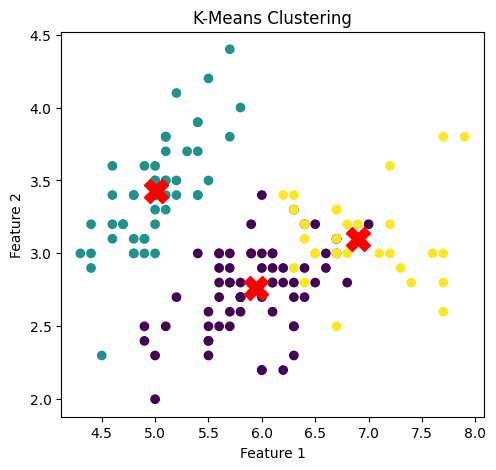

In [26]:
check_k_means()

#### __1.2__. Реализуйте алгоритм K-means++ без использования библиотек с реализацией данного метода (3 points)

In [37]:
def initialize_plus_plus(X, k):
    """ Инициализируйте центры кластеров """
    np.random.seed(42)

    n_samples, n_features = X.shape

    centroids = np.zeros((k, n_features))
    first_idx = np.random.choice(n_samples)
    centroids[0] = X[first_idx]

    for i in range(1, k):
        distances = ((X[:, np.newaxis, :] - centroids[:i][np.newaxis, :, :]) ** 2).sum(axis=2)

        min_distances = np.min(distances, axis=1)

        probabilities = min_distances / min_distances.sum()

        centroids[i] = X[np.random.choice(n_samples, p=probabilities)]

    return centroids

def k_means_plus_plus(X, k, max_iters=100, tol=1e-4):
    """ Реализуйте алгоритм K-means++ """
    centroids = initialize_plus_plus(X, k)

    for iter in range(max_iters):
        distances = ((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2)

        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return labels, centroids

# Automatic Checker
def check_k_means_plus_plus():
    iris = load_iris()
    X = iris.data
    y_true = iris.target

    labels_custom, centroids_custom = k_means_plus_plus(X, k=3)
    kmeans_sklearn = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10).fit(X)
    labels_sklearn = kmeans_sklearn.labels_

    score_custom = adjusted_rand_score(y_true, labels_custom)
    score_sklearn = adjusted_rand_score(y_true, labels_sklearn)
    print(score_custom)
    print(score_sklearn)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', marker='o')
    plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], s=300, c='red', marker='X')
    plt.title('K-Means++ Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    assert labels_custom is not None, "Function should return labels."
    assert len(labels_custom) == len(X), "Should return labels for all points."
    assert score_custom > 0.7, "Clustering should achieve a higher score."
    print(f"Task 1.2 Passed! Adjusted Rand Score: {score_custom:.2f}")


0.7163421126838476
0.7302382722834697
Task 1.2 Passed! Adjusted Rand Score: 0.72


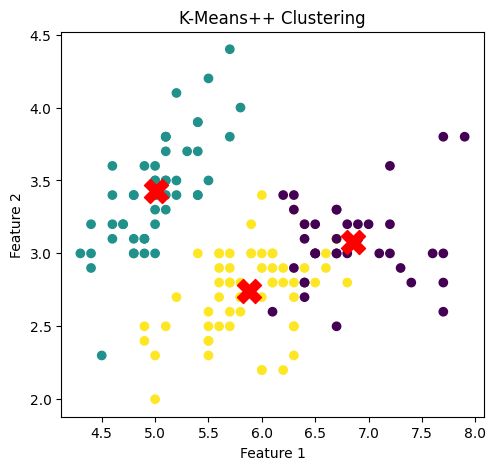

In [38]:
check_k_means_plus_plus()

### __2__. Оценка алгоритма DBSCAN (4 points)

Предположим, что вы анализируете движение такси в городе, чтобы определить популярные зоны посадки. У вас есть набор данных, представляющий места посадки такси.

```
data_points = [
    (1.2, 3.1), (2.5, 3.3), (1.8, 2.9), (8.2, 7.5),
    (8.1, 7.7), (25.3, 80.2), (2.0, 3.0), (3.0, 3.5),
    (1.1, 1.2), (90.0, 91.2), (1.5, 3.2), (8.0, 7.6),
    (2.2, 3.1), (7.9, 7.8), (1.3, 3.0)
]
```

Каждая точка представляет место посадки в такси с координатами (x, y) км от центра города.

С помощью алгортима DBSCAN сгруппируйте эти поездки на такси, чтобы определить зоны с высокой плотностью посадки. Укажите, какие из точек core, а какие являются выбросами.

Указание: выберите максимальное расстояние между точками равным __1.5__ и минимальное число точек в группе равным __3__.

Для решения этой задачи не используйте библиотеки с реализацией DBSCAN.

In [17]:
data_points = [
    (1.2, 3.1), (2.5, 3.3), (1.8, 2.9), (8.2, 7.5),
    (8.1, 7.7), (25.3, 80.2), (2.0, 3.0), (3.0, 3.5),
    (1.1, 1.2), (90.0, 91.2), (1.5, 3.2), (8.0, 7.6),
    (2.2, 3.1), (7.9, 7.8), (1.3, 3.0)
]

eps = 1.5
min_samples = 3

X = np.array(data_points)

def get_neighbours(X, i, eps):
    distances = np.sqrt(((X - X[i]) ** 2).sum(axis=1))

    neighbour_indices = np.where(distances <= eps)[0]
    return neighbour_indices

def dbscan(X, eps, min_samples):
    n = X.shape[0]

    labels = np.zeros(n)  # 0 - не посещена, -1 - шум, иначе - номер кластера
    core_indices = []
    cluster_id = 0

    for i in range(n):
        if labels[i] != 0:
            continue

        neighbours = get_neighbours(X, i, eps)

        if neighbours.shape[0] < min_samples:
            labels[i] = -1
            continue

        cluster_id += 1
        labels[i] = cluster_id
        core_indices.append(i)

        seed_set = set(neighbours)
        while seed_set:
            j = seed_set.pop()

            if j == i:
                continue

            if labels[j] == -1:
                labels[j] = cluster_id

            elif labels[j] == 0:
                labels[j] = cluster_id


                j_neighbours = get_neighbours(X, j, eps)

                if j_neighbours.shape[0] >= min_samples:
                    core_indices.append(j)

                    for neighbor_idx in j_neighbours:
                        if labels[neighbor_idx] == 0:
                            seed_set.add(neighbor_idx)

    return labels, core_indices

labels, core_indices = dbscan(X, eps, min_samples)

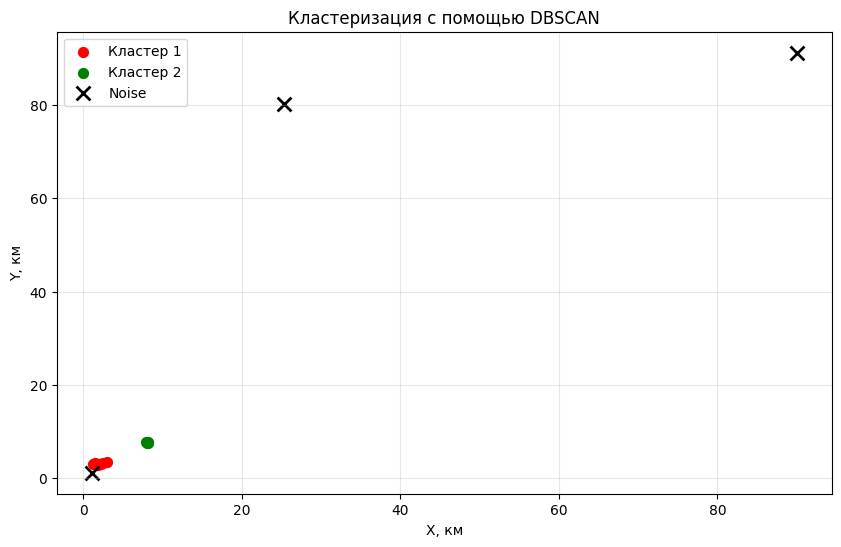

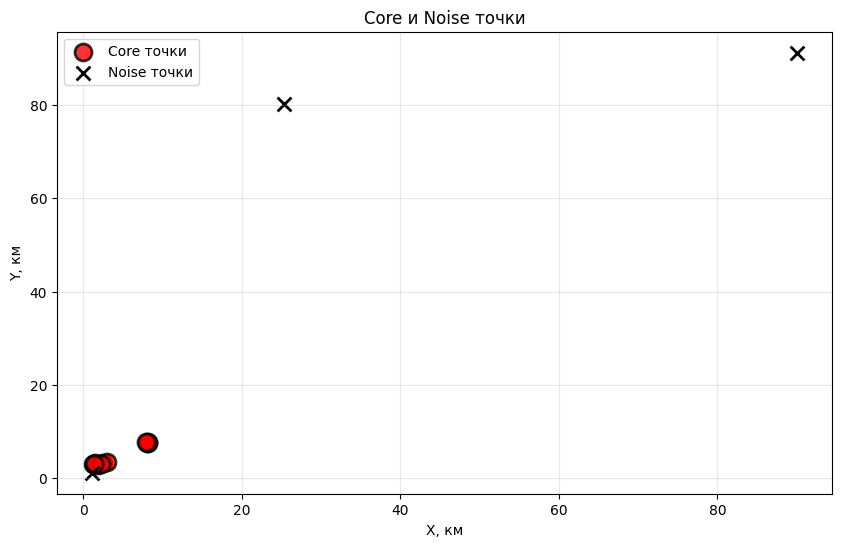

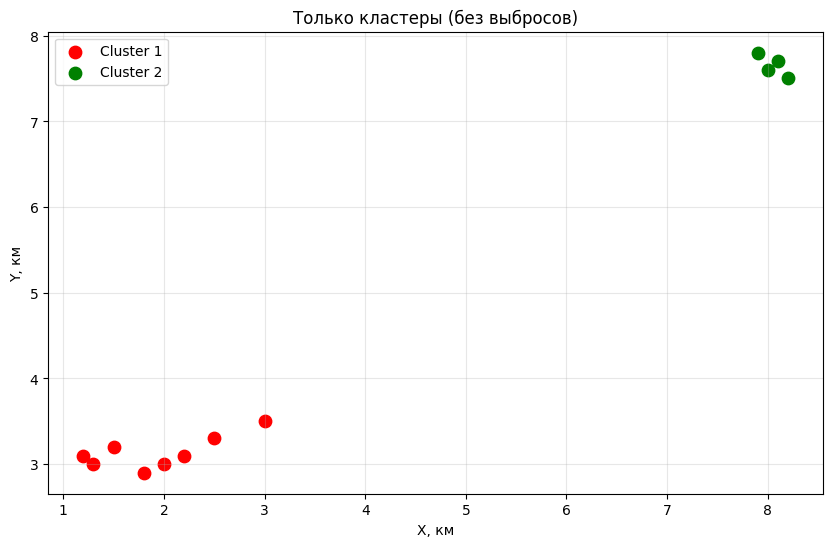

Core точки:
  Точка [1.2 3.1], кластер 1
  Точка [2.5 3.3], кластер 1
  Точка [1.8 2.9], кластер 1
  Точка [2. 3.], кластер 1
  Точка [3.  3.5], кластер 1
  Точка [1.5 3.2], кластер 1
  Точка [2.2 3.1], кластер 1
  Точка [1.3 3. ], кластер 1
  Точка [8.2 7.5], кластер 2
  Точка [8.  7.6], кластер 2
  Точка [8.1 7.7], кластер 2
  Точка [7.9 7.8], кластер 2

Noise точки:
  Точка [25.3 80.2]
  Точка [1.1 1.2]
  Точка [90.  91.2]


In [26]:
plt.figure(figsize=(10, 6))

colors = ['red', 'green', 'orange', 'blue', 'yellow']
for cluster_id in set(labels):
    cluster_id = int(cluster_id)
    if cluster_id == -1:
        noise_points = X[labels == -1]
        plt.scatter(noise_points[:, 0], noise_points[:, 1],
                   c='black', marker='x', s=100, label='Noise', linewidth=2)
    else:
        cluster_points = X[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=colors[cluster_id - 1], s=50, label=f'Кластер {cluster_id}')

plt.xlabel('X, км')
plt.ylabel('Y, км')
plt.title('Кластеризация с помощью DBSCAN')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))

core_points = X[core_indices]
plt.scatter(core_points[:, 0], core_points[:, 1],
           c='red', marker='o', s=150, label='Core точки', alpha=0.8, edgecolors='black', linewidth=2)

noise_points = X[labels == -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1],
           c='black', marker='x', s=100, label='Noise точки', linewidth=2)

plt.xlabel('X, км')
plt.ylabel('Y, км')
plt.title('Core и Noise точки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))

cluster_points_only = X[labels != -1]
cluster_labels_only = labels[labels != -1]

for cluster_id in set(cluster_labels_only):
    cluster_id = int(cluster_id)
    cluster_points = cluster_points_only[cluster_labels_only == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[cluster_id - 1], s=80, label=f'Cluster {cluster_id}')

plt.xlabel('X, км')
plt.ylabel('Y, км')
plt.title('Только кластеры (без выбросов)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Core точки:")
for i in core_indices:
    print(f"  Точка {X[i]}, кластер {int(labels[i])}")

print("\nNoise точки:")
noise_indices = [i for i in range(len(labels)) if labels[i] == -1]
for i in noise_indices:
    print(f"  Точка {X[i]}")

### __3__. (Доп.) Оценка алгоритма SVM (5 points)

Рассмотрим набор данных в 2D-пространстве, где первые два значения - это координаты точек, а третье значение - метка класса:

```
data_points = [
    (-4, 2, 1), (-1, -1, -1), (0, -2, -1), (1, -2, -1),
    (2, 3, 1), (3, 3, 1), (4, 4, 1), (-4, -3, -1), (-5, -2, -1),
    (5, 2, 1), (6, 1, 1), (-6, -1, -1), (-7, -3, -1), (7, 3, 1),
    (8, 4, 1), (-8, -5, -1), (9, 5, 1), (-9, -4, -1), (10, 6, 1),
]
```

1. Определите уравнение прямой, которая наилучшим образом разделяет два класса
2. Определите величину зазора (margin) и вектор, ортогональный разделяющей границе
3. Определите, какие точки являются опорными векторами

Указание: в данной задаче необходимо преобразовать двойственную задачу SVM к стандартному виду квадратичной задачи и использовать солвер (см. импорты и [документацию cvxopt](https://cvxopt.org/examples/tutorial/qp.html)), чтобы восстановить разделяющую гиперплоскость и опорные вектора.

In [12]:
data_points = [
    (-4, 2, 1), (-1, -1, -1), (0, -2, -1), (1, -2, -1),
    (2, 3, 1), (3, 3, 1), (4, 4, 1), (-4, -3, -1), (-5, -2, -1),
    (5, 2, 1), (6, 1, 1), (-6, -1, -1), (-7, -3, -1), (7, 3, 1),
    (8, 4, 1), (-8, -5, -1), (9, 5, 1), (-9, -4, -1), (10, 6, 1),
]

X = np.array([(x, y) for x, y, label in data_points])
y = np.array([label for x, y, label in data_points])

P = matrix((np.outer(y, y) * (X @ X.T)).astype(np.float64))

q = matrix(-np.ones(X.shape[0]))

A = matrix(y.astype(float).reshape(1, -1))
b = matrix(0.0)

G = matrix(-np.eye(X.shape[0]))
h = matrix(np.zeros(X.shape[0]))

solution = solvers.qp(P, q, G, h, A, b)
lambdas = np.array(solution['x']).flatten()

support_vectors_indices = np.where(lambdas > 1e-5)[0]
support_vectors = X[support_vectors_indices]
support_labels = y[support_vectors_indices]
support_lambdas = lambdas[support_vectors_indices]

w = np.sum(lambdas[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)

b = np.mean(y[support_vectors_indices] - support_vectors @ w)

margin = 2 / np.linalg.norm(w)

print(f'Прямая:{w[0]:.3f} * x1 + {w[1]:.3f} * x2 + {b:.3f} = 0')

print(f'Векторв, ортогональный разделяющей границе: {w}')

print(f'Margin: {margin:.3f}')

print("Опорные векторы:")
for i, idx in enumerate(support_vectors_indices):
    print(f"  Точка {X[idx]}, λ = {support_lambdas[i]:.4f}")

Прямая:0.074 * x1 + 0.741 * x2 + -0.185 = 0
Векторв, ортогональный разделяющей границе: [0.07407409 0.74074079]
Margin: 2.687
Опорные векторы:
  Точка [-4  2], λ = 0.1866
  Точка [-1 -1], λ = 0.2771
  Точка [6 1], λ = 0.0905


(np.float64(-12.1), np.float64(12.1), np.float64(-5.55), np.float64(6.55))

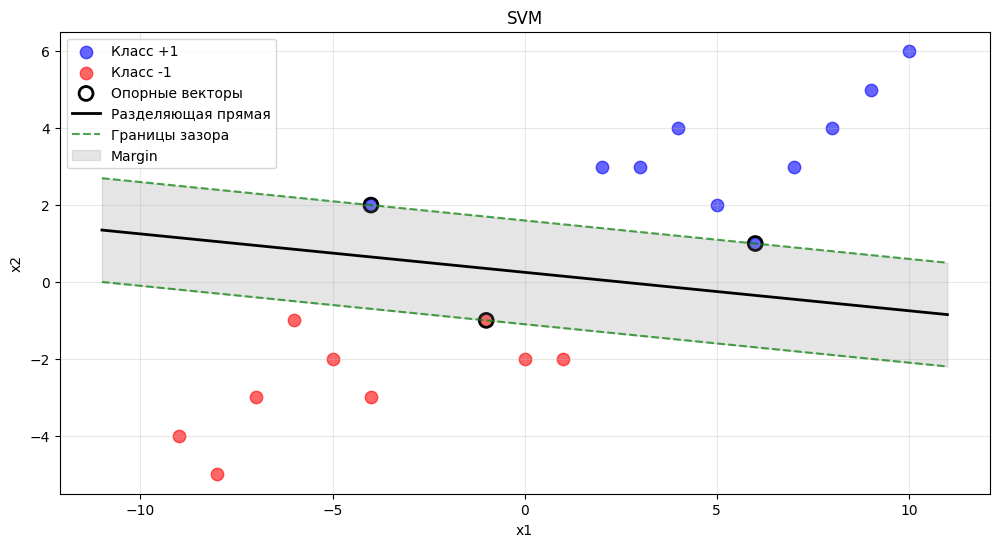

In [17]:
plt.figure(figsize=(12, 6))

class1 = X[y == 1]
class2 = X[y == -1]

x_lim = np.array([-11, 11])
y_lim = -(w[0] * x_lim + b) / w[1]

plt.scatter(class1[:, 0], class1[:, 1], c='blue', s=80, label='Класс +1', alpha=0.6)
plt.scatter(class2[:, 0], class2[:, 1], c='red', s=80, label='Класс -1', alpha=0.6)

plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
           facecolors='none', edgecolors='black', s=100, linewidth=2,
           label='Опорные векторы')

plt.plot(x_lim, y_lim, 'k-', linewidth=2, label='Разделяющая прямая')

y_upper = -(w[0] * x_lim + b - 1) / w[1]
y_lower = -(w[0] * x_lim + b + 1) / w[1]

plt.plot(x_lim, y_upper, 'g--', alpha=0.7, linewidth=1.5, label='Границы зазора')
plt.plot(x_lim, y_lower, 'g--', alpha=0.7, linewidth=1.5)

plt.fill_between(x_lim, y_upper, y_lower, alpha=0.2, color='gray', label='Margin')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

### __4__. Реализация алгоритма SVM (10 points)

----------------------------

#### __4.1__. Реализуйте алгоритм Linear SVM без использования библиотек с реализацией данного метода (5 points)

In [25]:
def linear_svm(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    """ Реализуйте Linear SVM """
    np.random.seed(42)

    n_samples, n_features = X.shape

    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(n_iters):
        margins = y * (X @ weights - bias)
        conditions = margins < 1

        if np.any(conditions):
            dw = 2 * lambda_param * weights - (X[conditions].T @ y[conditions]) / n_samples
            db = -np.sum(y[conditions]) / n_samples
        else:
            dw = 2 * lambda_param * weights
            db = 0

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict_svm(X, weights, bias):
    return np.sign(np.dot(X, weights) - bias)

# Automatic Checker
def check_linear_svm():
    X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=42)
    y = np.where(y == 0, -1, 1)

    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    weights, bias = linear_svm(X, y)
    y_pred = predict_svm(X, weights, bias)

    svm_sklearn = SVC(kernel='linear', random_state=42)
    svm_sklearn.fit(X, y)
    y_pred_sklearn = svm_sklearn.predict(X)

    accuracy = accuracy_score(y, y_pred)
    accuracy_sklearn = accuracy_score(y, y_pred_sklearn)

    assert accuracy > 0.85, "Accuracy should be higher"
    print(f"Task 4.1 Passed! Accuracy: {accuracy:.2f}")

In [26]:
check_linear_svm()

Task 4.1 Passed! Accuracy: 0.87


#### __4.2__. Реализуйте Kernel SVM с использованием RBF ядра без использования библиотек с реализацией данного метода (5 points)

In [27]:
def rbf_kernel(X, Y=None, gamma=0.1):
    if Y is None:
        Y = X
    """ Определите RBF kernel """
    X_norm = np.sum(X**2, axis=1)[:, np.newaxis]
    Y_norm = np.sum(Y**2, axis=1)[np.newaxis, :]

    distances = X_norm - 2 * np.dot(X, Y.T) + Y_norm

    K = np.exp(-gamma * distances)
    return K

def kernel_svm(X, y, gamma=0.1, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    """ Реализуйте Kernel SVM """

    n_samples = X.shape[0]
    alpha = np.zeros(n_samples)
    K = rbf_kernel(X, gamma=gamma)

    for epoch in range(n_iters):
        predictions = K @ (alpha * y)

        conditions = y * predictions < 1

        grad = np.zeros(n_samples)
        grad[conditions] = 1 - 2 * lambda_param * alpha[conditions]
        grad[~conditions] = -2 * lambda_param * alpha[~conditions]

        alpha += learning_rate * grad

        alpha = np.maximum(alpha, 0)

    return alpha

def predict_kernel_svm(X, X_train, y_train, alpha, gamma=0.1):
    K = rbf_kernel(X, X_train, gamma)
    return np.sign(np.dot(K, alpha * y_train))

# Automatic Checker
def check_kernel_svm():
    X, y = make_moons(n_samples=50, noise=0.01, random_state=42)
    y = np.where(y == 0, -1, 1)

    alpha = kernel_svm(X, y)
    y_pred = predict_kernel_svm(X, X, y, alpha)

    svm_sklearn = SVC(kernel='rbf', gamma=0.1, random_state=42)
    svm_sklearn.fit(X, y)
    y_pred_sklearn = svm_sklearn.predict(X)

    accuracy = accuracy_score(y, y_pred)
    accuracy_sklearn = accuracy_score(y, y_pred_sklearn)

    print(accuracy_sklearn)

    assert accuracy > 0.8, "Accuracy should be higher"
    print(f"Task 4.2 Passed! Accuracy: {accuracy:.2f}")

In [28]:
check_kernel_svm()

0.84
Task 4.2 Passed! Accuracy: 0.84
